In [1]:
# ============================
# Task 1: Load and Explore Dataset
# ============================

import pandas as pd
import matplotlib.pyplot as plt

# Try to load iris.csv, if not found use sklearn built-in dataset
try:
    df = pd.read_csv("iris.csv")
except FileNotFoundError:
    from sklearn.datasets import load_iris
    iris = load_iris(as_frame=True)
    df = iris.frame

# Show first 5 rows
df.head()
# Show dataset info
df.info()

# Handle missing values (drop rows with NaN, if any)
df = df.dropna()
df.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:

# Task 2: Basic Data Analysis

# Summary statistics
df.describe()

# Group by a categorical column (species) and compute mean of numeric columns
if "target" in df.columns:   # sklearn iris dataset
    grouped = df.groupby("target").mean()
else:                        # if CSV version with species name
    grouped = df.groupby("species").mean()

grouped
# Simple observation
print("Observation: Each species has different average measurements. For example,")
print("Setosa has smaller petal length compared to Versicolor and Virginica.")



Observation: Each species has different average measurements. For example,
Setosa has smaller petal length compared to Versicolor and Virginica.


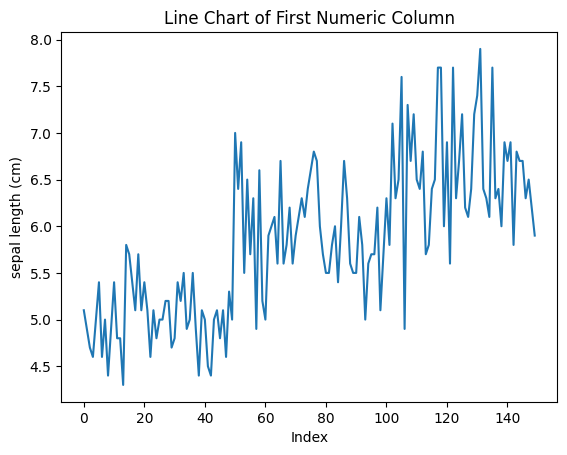

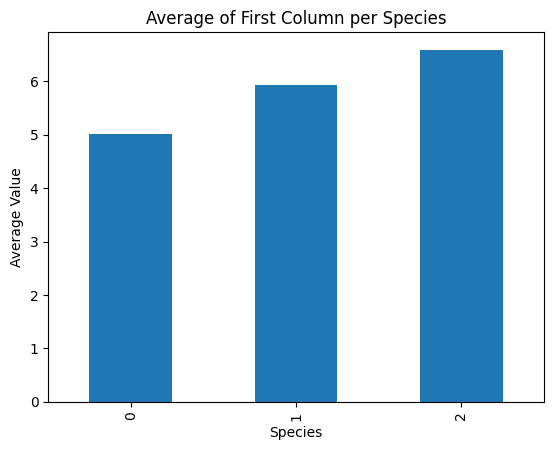

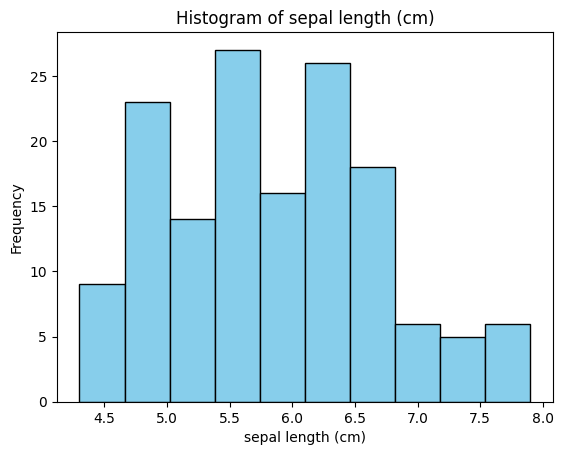

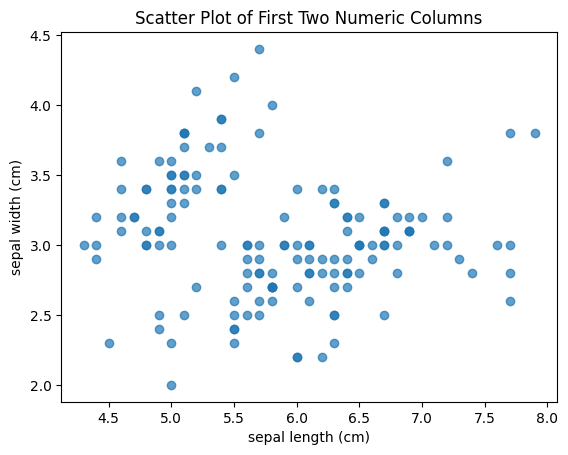

In [3]:
# ============================
# Task 3: Data Visualization
# ============================

# 1. Line chart (example: trend of sepal length across rows)
plt.plot(df.index, df.iloc[:, 0])  # first numeric column
plt.title("Line Chart of First Numeric Column")
plt.xlabel("Index")
plt.ylabel(df.columns[0])
plt.show()

# 2. Bar chart (mean of first numeric column per species)
if "target" in df.columns:
    df.groupby("target")[df.columns[0]].mean().plot(kind="bar")
else:
    df.groupby("species")[df.columns[0]].mean().plot(kind="bar")

plt.title("Average of First Column per Species")
plt.xlabel("Species")
plt.ylabel("Average Value")
plt.show()

# 3. Histogram (distribution of first numeric column)
plt.hist(df.iloc[:, 0], bins=10, color="skyblue", edgecolor="black")
plt.title("Histogram of " + df.columns[0])
plt.xlabel(df.columns[0])
plt.ylabel("Frequency")
plt.show()

# 4. Scatter plot (relationship between first 2 numeric columns)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], alpha=0.7)
plt.title("Scatter Plot of First Two Numeric Columns")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

